![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Exercise 04 - Insurance Regression </center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/Exercises/Exercise04_Regression.ipynb)

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})

# np.random.seed(1)
# %matplotlib notebook

### Get data:
From Kaggle: https://www.kaggle.com/mirichoi0218/insurance

In [3]:
dData = pd.read_csv('insurance.csv')
dData

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### Change columns names:

In [4]:
dData.columns = ['Age', 'Sex', 'BMI', 'NumberOfChildren', 'Smoker', 'Region', 'Charges']
dData

,Age,Sex,BMI,NumberOfChildren,Smoker,Region,Charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
dData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1338 non-null   int64  
 1   Sex               1338 non-null   object 
 2   BMI               1338 non-null   float64
 3   NumberOfChildren  1338 non-null   int64  
 4   Smoker            1338 non-null   object 
 5   Region            1338 non-null   object 
 6   Charges           1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
dData.describe()

,Age,BMI,NumberOfChildren,Charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Create dummies variables:

In [7]:
dData = pd.get_dummies(dData, drop_first=True)

#-- Move charges to the last columns:
lCols = dData.columns.drop('Charges').tolist() + ['Charges']
dData = dData[lCols]
dData

,Age,BMI,NumberOfChildren,Sex_male,Smoker_yes,Region_northwest,Region_southeast,Region_southwest,Charges
0,19,27.900,0,0,1,0,0,1,16884.92400
1,18,33.770,1,1,0,0,1,0,1725.55230
2,28,33.000,3,1,0,0,1,0,4449.46200
3,33,22.705,0,1,0,1,0,0,21984.47061
4,32,28.880,0,1,0,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0,10600.54830
1334,18,31.920,0,0,0,0,0,0,2205.98080
1335,18,36.850,0,0,0,0,1,0,1629.83350
1336,21,25.800,0,0,0,0,0,1,2007.94500


### Pair plot (without split):

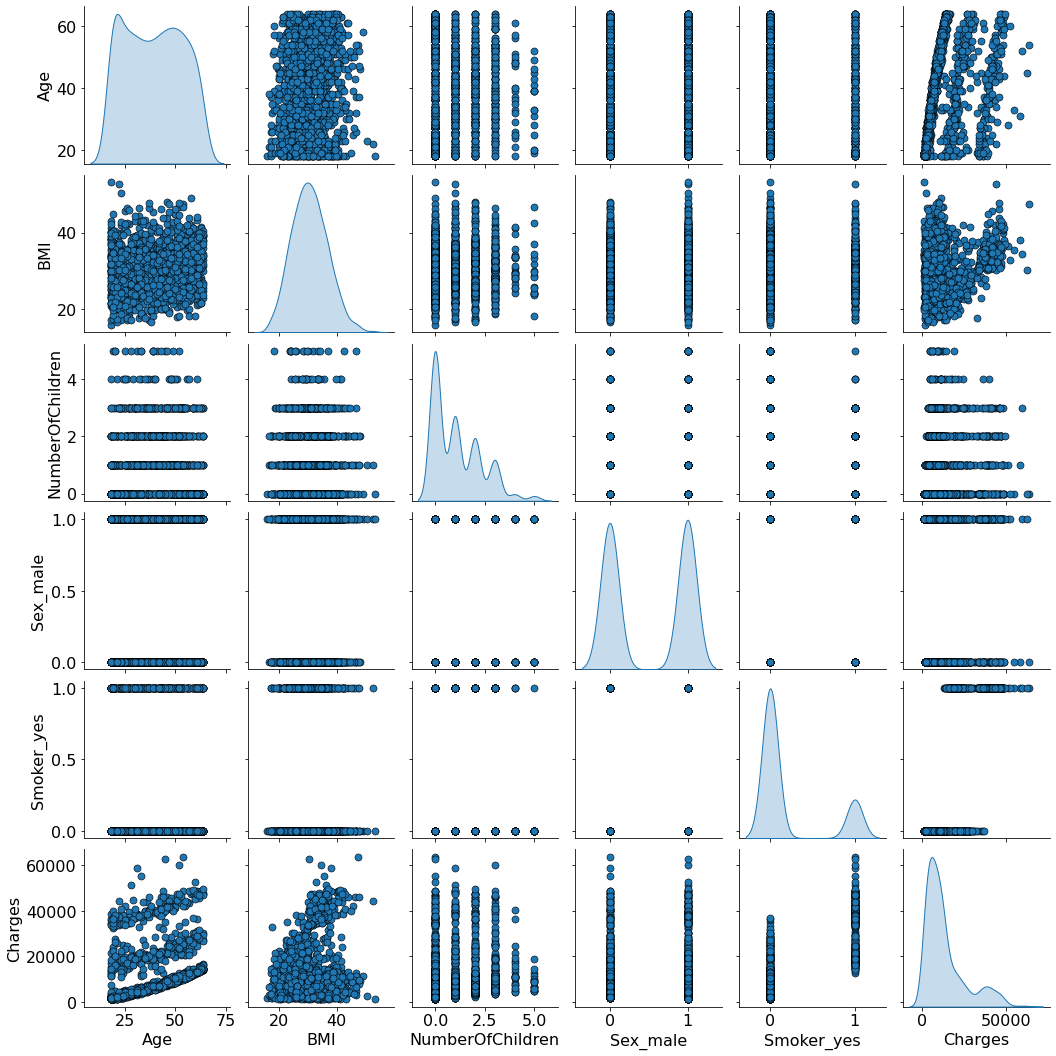

In [8]:
lVars = ['Age', 'BMI', 'NumberOfChildren', 'Sex_male', 'Smoker_yes', 'Charges']
sns.pairplot(dData, vars=lVars, diag_kind='kde', plot_kws={'s':50, 'edgecolor':'k'})
plt.show()

#### Pair plot (split on sex):

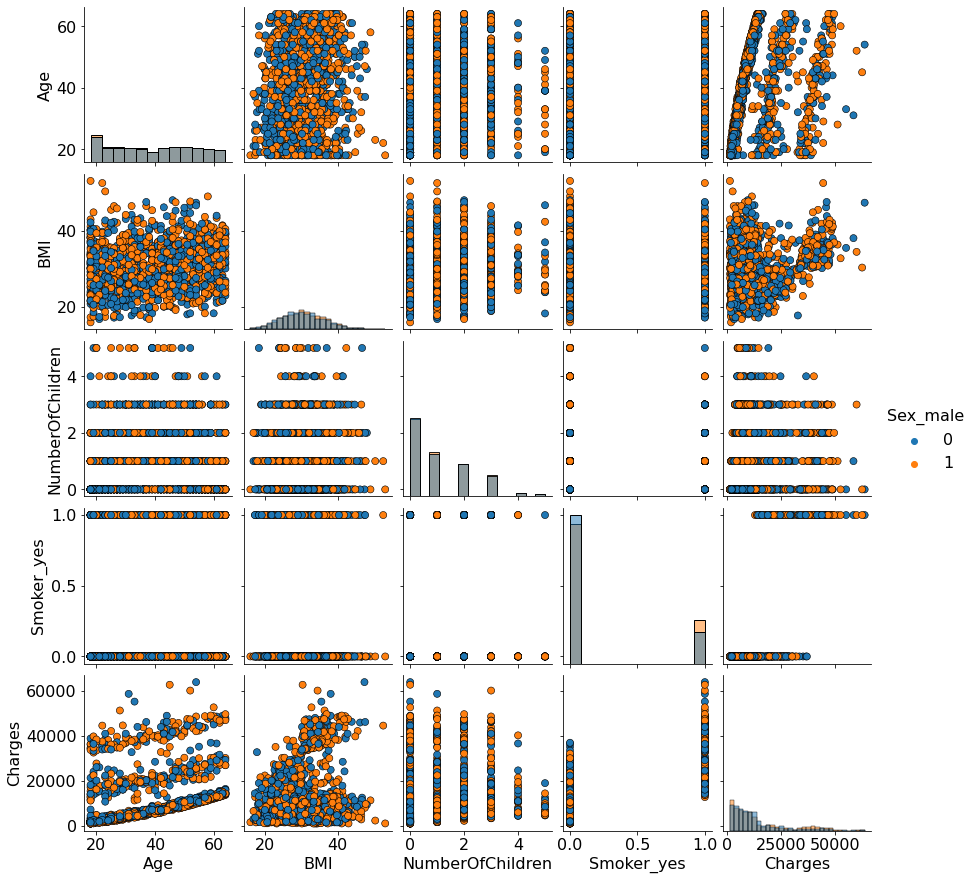

In [9]:
lVars = ['Age', 'BMI', 'NumberOfChildren', 'Smoker_yes', 'Charges']
sns.pairplot(dData, vars=lVars, diag_kind='hist', hue='Sex_male', plot_kws={'s':50, 'edgecolor':'k'})
plt.show()

### Pair plot (split on smoker):

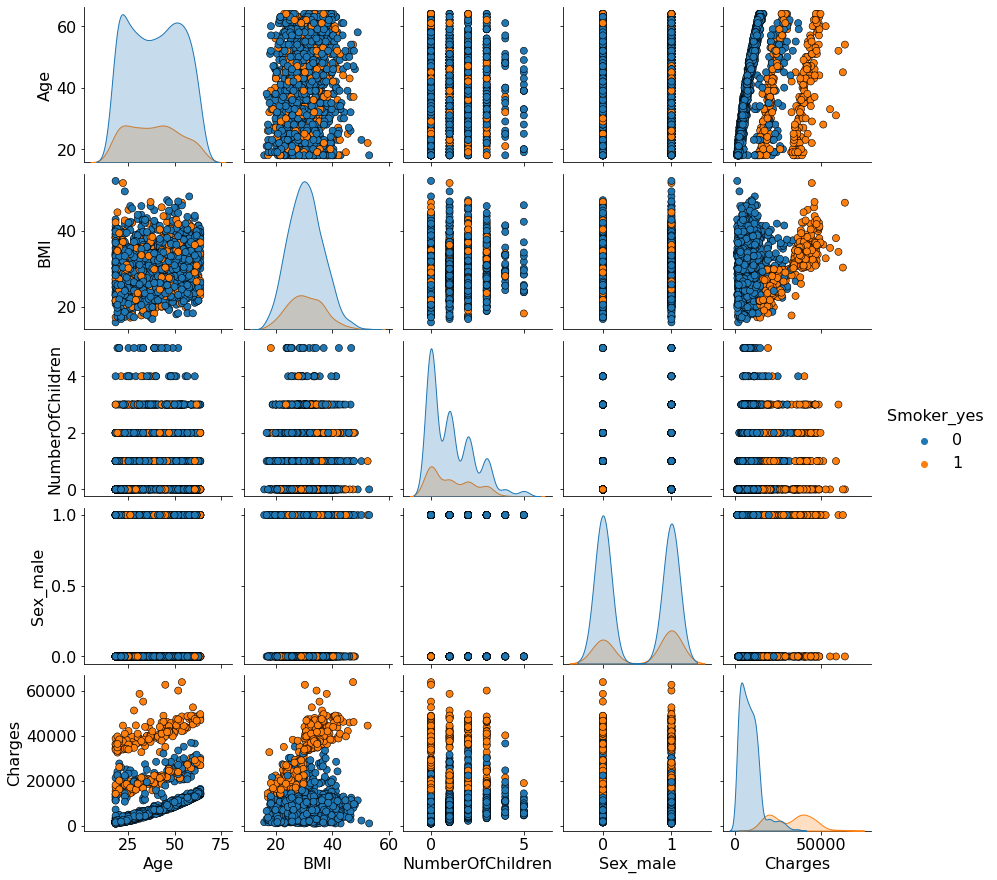

In [10]:
lVars = ['Age', 'BMI', 'NumberOfChildren', 'Sex_male', 'Charges']
sns.pairplot(dData, vars=lVars, diag_kind='kde', hue='Smoker_yes', plot_kws={'s':50, 'edgecolor':'k'})
plt.show()

### Pair plot (split on smoker + regression):

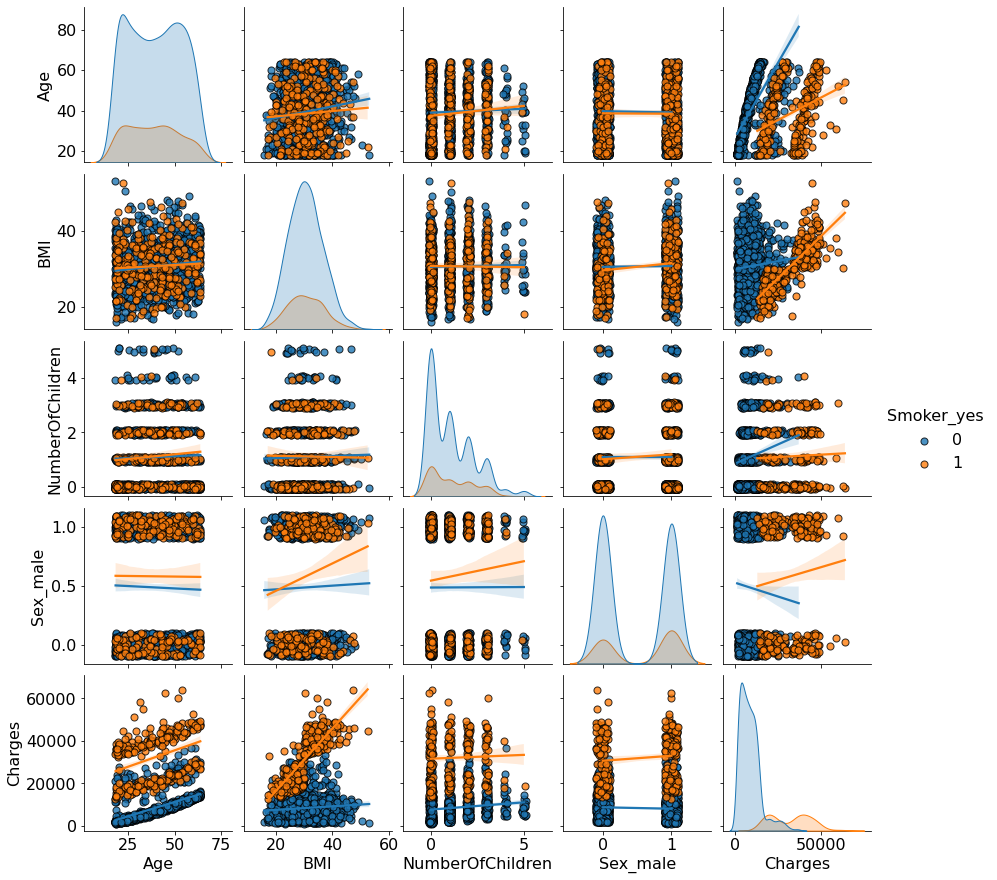

In [11]:
lVars = ['Age', 'BMI', 'NumberOfChildren', 'Sex_male', 'Charges']
sns.pairplot(dData, vars=lVars, kind='reg', diag_kind='auto', hue='Smoker_yes', plot_kws={'x_jitter':.1, 'y_jitter':.1, 'scatter_kws':{'s':50, 'edgecolor':'k'}})
plt.show()

### Some more plots:

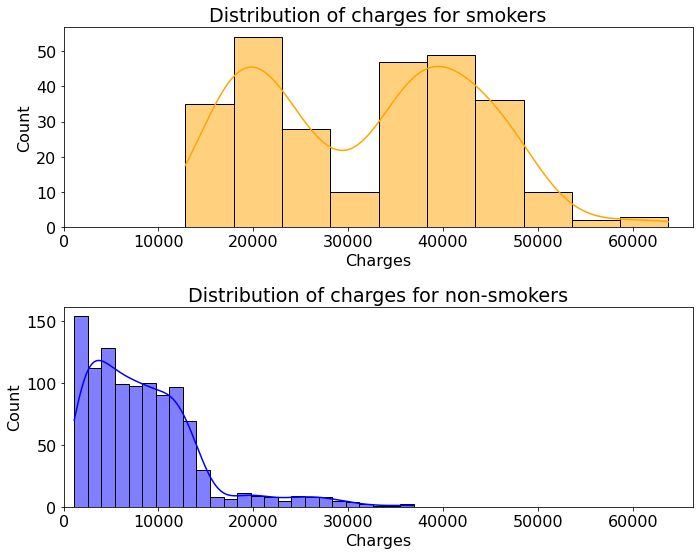

In [12]:
_, ax = plt.subplots(2, 1, figsize=(10, 8))
sns.histplot   (dData[dData.Smoker_yes == 1]["Charges"], color='orange', ax=ax[0], kde=True)
sns.histplot   (dData[dData.Smoker_yes == 0]['Charges'], color='blue',   ax=ax[1], kde=True)
ax[0].set_title('Distribution of charges for smokers')
ax[1].set_title('Distribution of charges for non-smokers')
ax[0].set_xlim (left=0)
ax[1].set_xlim (ax[0].axis()[:2])

plt.tight_layout()

#### Sex, Smoker & Charges:

0    1064
1     274
Name: Smoker_yes, dtype: int64


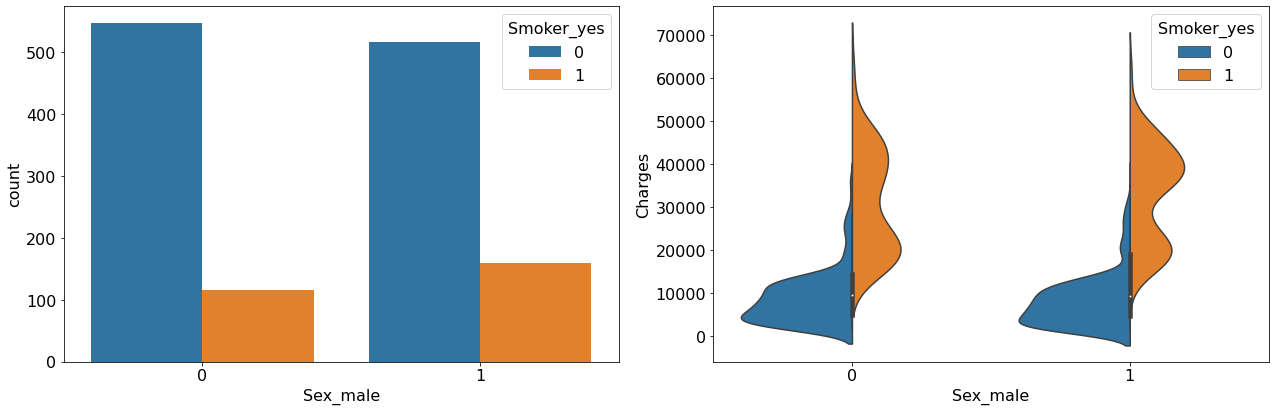

In [13]:
_, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.countplot (x='Sex_male',              hue='Smoker_yes', data=dData, ax=ax[0])
sns.violinplot(x='Sex_male', y='Charges', hue='Smoker_yes', data=dData, ax=ax[1], split=True)

plt.tight_layout()
print(dData['Smoker_yes'].value_counts())

#### Sex, Smoker & BMI:

0    1064
1     274
Name: Smoker_yes, dtype: int64


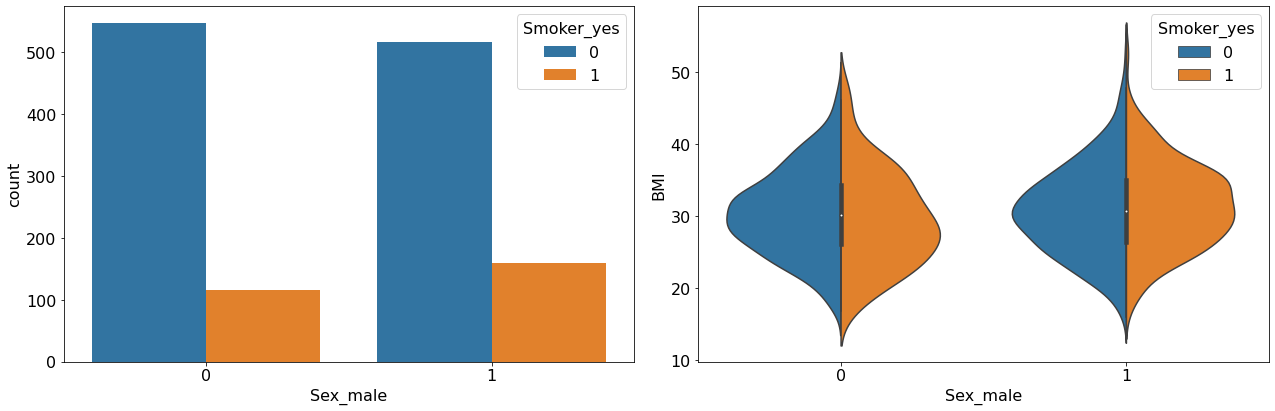

In [14]:
_, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.countplot (x='Sex_male',          hue='Smoker_yes', data=dData, ax=ax[0])
sns.violinplot(x='Sex_male', y='BMI', hue='Smoker_yes', data=dData, ax=ax[1], split=True)

plt.tight_layout()
print(dData['Smoker_yes'].value_counts())

#### Age, Smoker & Charges:

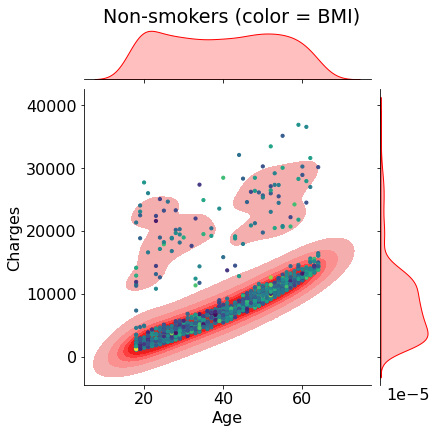

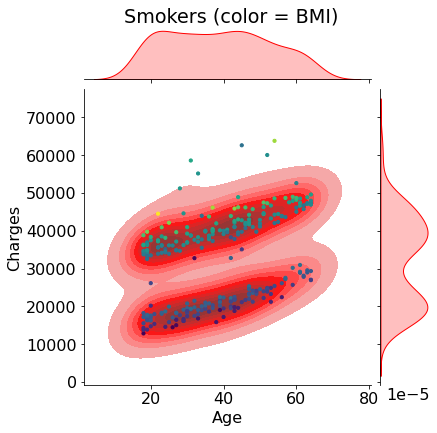

In [15]:
vSmokerBMI    = dData.loc[dData['Smoker_yes'] == 1, ['BMI']].values
vNonSmokerBMI = dData.loc[dData['Smoker_yes'] == 0, ['BMI']].values

g1 = sns.jointplot(x='Age', y='Charges', data=dData[(dData.Smoker_yes == 0)], kind='kde', color='red', fill=True)
g1.plot_joint     (plt.scatter, c=vNonSmokerBMI, s=10)
g1.fig.suptitle   ('Non-smokers (color = BMI)', y=1.01)

g1 = sns.jointplot(x='Age', y='Charges', data=dData[(dData.Smoker_yes == 1)], kind='kde', color='red', fill=True)
g1.plot_joint     (plt.scatter, c=vSmokerBMI, s=10)
g1.fig.suptitle   ('Smokers (color = BMI)', y=1.01)
plt.show()

###  BMI:

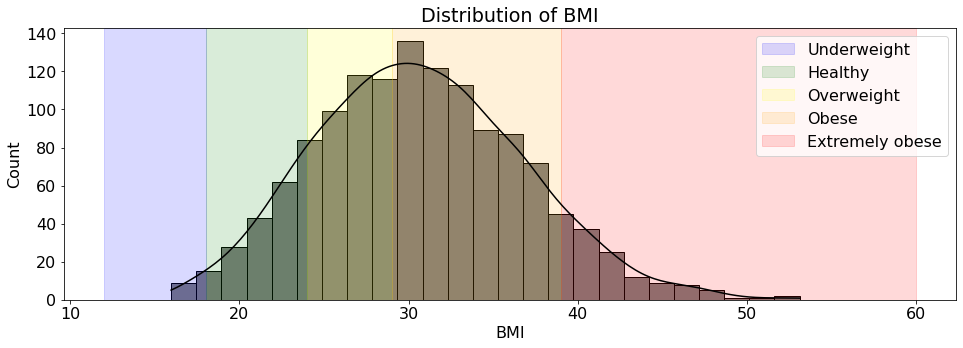

In [16]:
plt.figure(figsize=(16,5))
ax = sns.histplot(dData['BMI'], color = 'k', kde=True)
ax.axvspan(12, 18, alpha=0.15, color='blue',   label='Underweight')
ax.axvspan(18, 24, alpha=0.15, color='green',  label='Healthy')
ax.axvspan(24, 29, alpha=0.15, color='yellow', label='Overweight')
ax.axvspan(29, 39, alpha=0.15, color='orange', label='Obese')
ax.axvspan(39, 60, alpha=0.15, color='red',    label='Extremely obese')
plt.title ('Distribution of BMI')
plt.legend()
plt.show  ()

#### Age, Smoker, Charges & BMI:

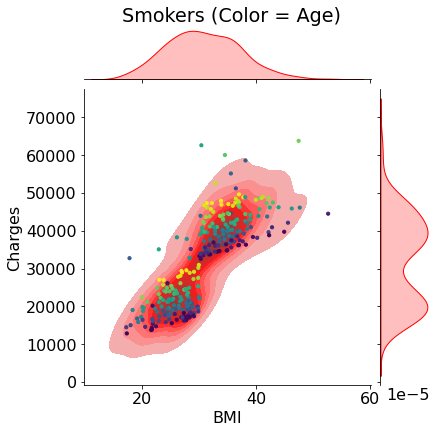

In [17]:
vSmokerAge = dData.loc[dData['Smoker_yes'] == 1, ['Age']].values

g1 = sns.jointplot(x='BMI', y='Charges', data=dData[(dData.Smoker_yes == 1)], kind='kde', color='red', fill=True)
g1.plot_joint     (plt.scatter, c=vSmokerAge, s=10)
g1.fig.suptitle   ('Smokers (Color = Age)', y=1.01)
plt.show          ()

### Regression

#### Simple linear regression (on the training set):

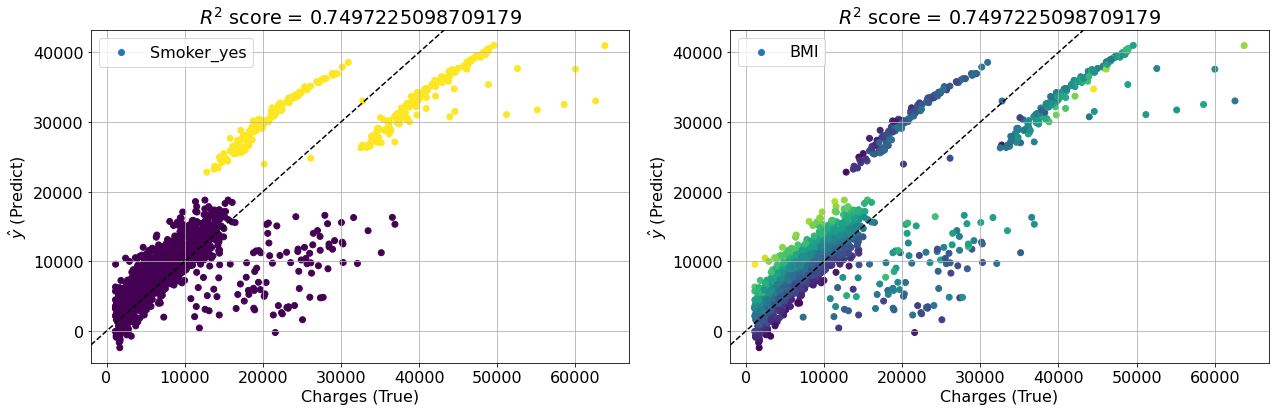

In [18]:
from sklearn.linear_model import LinearRegression

# dTrainX = dData.drop(columns='Charges')
dTrainX = dData.drop(columns=['Charges', 'Region_northwest', 'Region_southeast', 'Region_southwest'])
dTrainY = dData['Charges']

oLinearRegresor = LinearRegression().fit (dTrainX, dTrainY)
vHatY           = oLinearRegresor.predict(dTrainX)
R2score         = oLinearRegresor.score  (dTrainX, dTrainY)

_, ax = plt.subplots(1, 2, figsize=(18, 6))
lColor = ['Smoker_yes', 'BMI']
for ii in range(2):
    ax[ii].scatter   (dTrainY, vHatY, c=dTrainX[lColor[ii]], label=lColor[ii])
    ax[ii].axis      ('tight')
    ax[ii].plot      (xy := ax[ii].axis()[:2], xy, '--k') #-- new python syntax
    ax[ii].set_title (f'$R^2$ score = {R2score}')
    ax[ii].set_xlabel('Charges (True)')
    ax[ii].set_ylabel('$\hat{y}$ (Predict)')
    ax[ii].grid      ('True')
    ax[ii].legend    ()

plt.tight_layout()
plt.show()

#### Polynomial regression:

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline      import make_pipeline

def PlotFit(P):
    oPolyFit = make_pipeline(
        PolynomialFeatures(degree=P, include_bias=False),
        LinearRegression  (normalize=True)
    )
    oPolyFit.fit(dTrainX, dTrainY)
    vHatY   = oPolyFit.predict(dTrainX)
    R2score = oPolyFit.score(dTrainX, dTrainY)

    _, ax = plt.subplots(1, 2, figsize=(18, 6))
    lColor = ['Smoker_yes', 'BMI']
    for ii in range(2):
        ax[ii].scatter   (dTrainY, vHatY, c=dTrainX[lColor[ii]])
        ax[ii].axis      ('tight')
        ax[ii].plot      (xy := ax[ii].axis()[:2], xy, '--k')
        ax[ii].set_title ('$R^2$ score = ' + str(R2score))
        ax[ii].set_xlabel('Charges (True)')
        ax[ii].set_ylabel('$\hat{y}$ (Predict)')
        ax[ii].grid      ('True')

    plt.tight_layout()

In [20]:
from ipywidgets import interact, IntSlider, Layout

pSlider = IntSlider(min=1, max=10, step=1, value=1, layout=Layout(width='80%'))
interact(PlotFit, P=pSlider)
plt.show()

interactive(children=(IntSlider(value=1, description='P', layout=Layout(width='80%'), max=10, min=1), Output()…

In [21]:
mX = dTrainX.values
vY = dTrainY.values

mX -= np.mean(mX, axis=0)
mX /= np.std (mX, axis=0)
vY -= np.mean(vY)
vY /= np.std (vY)

mX.shape, vY.shape

((1338, 5), (1338,))

### Exercise 1:
* Train a linear regressor (with or without polynomial features).
* Try to get the best $R^2$ score with $K=50$ fold cross-validation.
* Hint: Consider using $L^1$ regularization (LASSO).

In [22]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics         import r2_score

#-- Cross validation regression:
???

Object `?` not found.


In [23]:
from sklearn.linear_model import Lasso

#-- Cross validation regression with Lasso:
???

Object `?` not found.


### Exercise 2:
* Try non-parametric models.
* Hint: Consider splitting your data into two subsets and train two regressors (one for each set).
* Improve your $R^2$ score from exercise 1.
* Hint: Should you use all features?